In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Principal Component Analysis (PCA): Toy Example
### Build the dataset
Build $X \in \mathbb{R}^{m \times n}$, $m$ data points $\in \mathbb{R^n}$.

Let $m = 400$ et $n=2$ (i.e., each row $A$ represents a point in $\mathbb{R}^2$).

+ To build $X$ we first create a matrix $A \in \mathbb{R}^{m \times n}$ such that $\forall i,j A_{i,j}\sim \mathcal{N}(0,1)$ 
+ Then we transform $A$ by applying a matrix $T$ (rotation, and scaling)

In [92]:
m = 400
n = 2
T = np.array([[-0.5,0.3],
              [1,2]])
A = np.random.randn(m,n) 
X = np.dot(A,T)

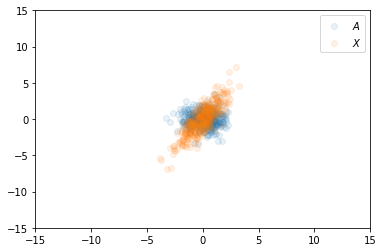

In [93]:
plt.plot(A[:,0],A[:,1],"o",alpha=0.1,label="$A$")
plt.plot(X[:,0],X[:,1],"o",alpha=0.1,label="$X$")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.legend()

### Center the dataset
+ Let $E[ X_{.,i} ]$ be the mean of $X$ along column $i$.
+ Let us center each column $i$ of $X$ by computing $X_{.,i} \leftarrow X_{.,i} - E[X_{.,i}]$

In [94]:
Xc = X - X.mean(axis=0)
print(X.mean(axis=0), Xc.mean(axis=0))

[-0.06165165 -0.02088023] [-2.88657986e-17  4.71844785e-18]


### Covariance Matrix



+ The covariance between column vectors $X_{.,i}$ and $X_{.,j}$ is defined as:

$cov [X_{.,i},X_{.,j}]= \sum_{k=1}^m \frac{(X_{k,i}-E[X_{.,i}])(X_{k,j}-{E}[X_{.,j}])}{m}$

+ Since we have centered our dataset: $\forall i, \; E[X_{.,i}] = 0$, then:

$cov [X_{.,i},X_{.,j}]= \sum_{k=1}^m \frac{X_{k,i}X_{k,j}}{m}$

+ In matrix notation 

$cov [X_{.,i},X_{.,j}] = \frac{1}{m} X_{.,i}^* \cdot X_{.,j}$

+ Therefore matrix $Q = X^* \cdot X$ is proportional to the covariance matrix (by a factor $\frac{1}{m}$)



+ __Question 1__: Compute the covariance matrix of $X$

In [95]:
Q = Xc.T.dot(Xc)
Q*1/Xc.shape[0]

array([[1.31026761, 1.89946472],
       [1.89946472, 4.04862053]])

+ __Question 2.A__: Compute the eigen vectors $V$ and eigen values $\lambda$ of matrix $Q = X^*\cdot X$

(recall: $Q\cdot V_{.,i} = \lambda_i V_{.,i} \$)

In [143]:
lamb,V = np.linalg.eig(Q)

In [144]:
Q.dot(V), V*lamb

(array([[ -120.32964386,  -915.14128197],
        [   61.59579564, -1787.76202813]]),
 array([[ -120.32964386,  -915.14128197],
        [   61.59579564, -1787.76202813]]))

+ __Question 2.B__: The eigen values in numpy are not always sorted, sort them in descending order:


In [145]:
idx = lamb.argsort()[::-1]   
lamb = lamb[idx]
V = V[:,idx]

+ __Question 2.C:__ Plot the variance explained along each Principal Axis.

Text(0, 0.5, 'Variance explained')

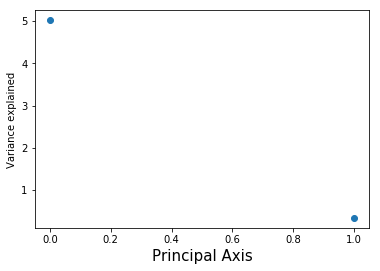

In [163]:
plt.plot(lamb/Xc.shape[0], "o")
plt.xlabel("Principal Axis",fontsize=15)
plt.ylabel('Variance explained')

+ __Question 2.D:__ Plot the percentage of variance explained along each Principal Axis.

Text(0, 0.5, 'Variance explained (%)')

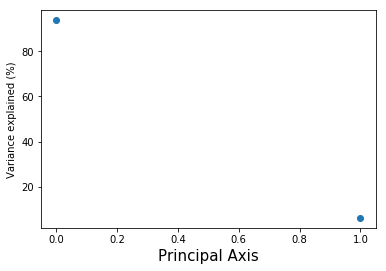

In [164]:
plt.plot(lamb/lamb.sum()*100, "o")
plt.xlabel("Principal Axis",fontsize=15)
plt.ylabel('Variance explained (%)')

### Principal Component Analysis

+ Let $PC_i = X \cdot V_{.,i}$ be the $i$-th Principal Component.

+ Compute the covariance between $PC_j$ and $PC_k$ 

$\begin{aligned} cov[PC_j,PC_k] &\propto (X \cdot V_{.,j})^{*} \cdot (X \cdot  V_{.,k})\\&= V_{.,j}^*\cdot X^*\cdot X\cdot  V_{.,k}\\&=V_{.,j}^*\cdot (\lambda_k V_{.,k})\\&=\lambda_k V_{.,j}^{*}\cdot V_{.,k}\end{aligned}$


+ If $j=k$: 

$cov[PC_j,PC_k] = cov[PC_k,PC_k] \propto \lambda_k$

+ Otherwise:

$cov[PC_j,PC_k] = 0$

+ __Question 3.A__: Explain the role of the Principal Component Analysis

+ Apply the matrix $V$ to $X$ and plot the Principal Components
+ Apply the matrix $V$ to the cardinal basis and plot them

In [146]:
PC = Xc.dot(V)
axis_proj = np.eye(2).dot(V)

(-5, 5)

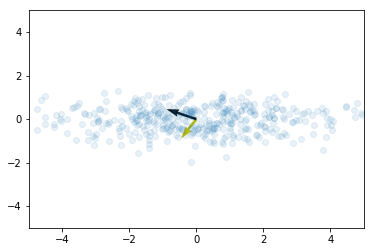

In [147]:
plt.plot(PC[:,0],PC[:,1],"o",alpha=0.1)
plt.quiver(*axis_proj[0,:],color="y",angles='xy', scale_units='xy', scale=1)
plt.quiver(*axis_proj[1,:],color="k",angles='xy', scale_units='xy', scale=1)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

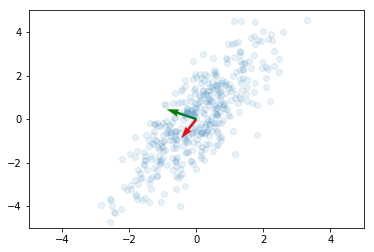

In [148]:
plt.plot(Xc[:,0],Xc[:,1],"o",alpha=0.1)
plt.quiver(*V.T[0,:],color="r",angles='xy', scale_units='xy', scale=1)
plt.quiver(*V.T[1,:],color="g",angles='xy', scale_units='xy', scale=1)
plt.xlim(-5,5)
plt.ylim(-5,5)

__Question 3.B:__ Given the structure of the dataset in the new space, and the persentage of variance explained along each principal axis, does it seem necessary to keep a a 2D space representation?

## Principal Component Analysis and SVD

The singular value decomposition (SVD) of $X$ is:

$X = U \cdot \Sigma \cdot \mathbf{V}^*$

+ $U$ is a $m\times m$ unit orthogonal matrix (called left singular vectors of X)
+ $V$ is a $n\times n$ unit orthogonal matrix (called right singular vectors of X)
+ $\Sigma$ is an $m\times n$ positive rectangular diagonal matrix (singular values of X)


Using the SVD, $X^* X$ can be written as:

$\begin{aligned}X^*X &=V \Sigma^* U^* U \Sigma V^*\\&= V \Sigma^*\Sigma V^* \\&= V \hat {\Sigma}^{2}V^*\end{aligned}$

Therefore: 

+ The __right singular vectors__ $V$ of $X$ and the __eigenvectors__ of $X^*X$ are equivalent.
+ The __singular values__  of $X$ are equal to the sqrt of the the __eigenvalues__ of $X^*X$.

$$PC = U\cdot \Sigma = X\cdot V$$

__Question 4:__ Compute the Principal Components of $X$ using the SVD

In [138]:
U,s,Vt = np.linalg.svd(Xc)

In [139]:
PC = Xc.dot(Vt)

(-5, 5)

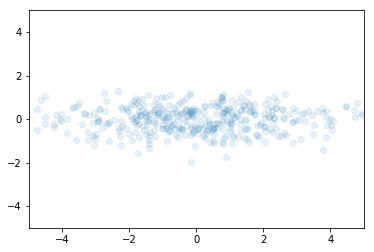

In [150]:
plt.plot(PC[:,0],PC[:,1],"o", alpha=0.1)
plt.xlim(-5,5)
plt.ylim(-5,5)

# Principal Component Analysis (PCA): Faces dataset
## Load the dataset

In [211]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
faces.shape

(400, 4096)

Each row of the `faces` dataset represents a human face picture in gray scale.
The dataset contains 400 pictures in total.

In practice, the size of a picture is $64 \times 64$ pixels, and in order to fill the matrix, each picture has been flattened in a row vector with 4096 ($=64 \times 64$) elements.

Therefore the faces image represents 400 pictures described in a 4096 dimensional space of pixels.

If we transpose the faces dataset, we have 4096 pixels described in a 400 dimensional space of human faces.

In this practical work we are going to use the SVD to find the "Principal Faces" in the dataset

__Question 1__: Reshape the first row of the dataset, to create a $64\times 64$ image, and plot the first face, using the `plt.imshow`

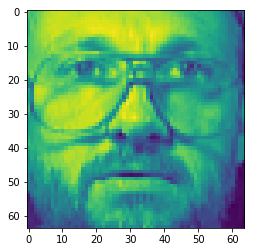

In [212]:
first_face = faces[0,:]
reshaped_first_face = first_face.reshape(64,64)
plt.imshow(reshaped_first_face)

__Question 4__: Transpose the `faces` matrix and center each column

__Question 3__: Compute its SVD

__Question 4:__ Plot the percentage of standard deviation explained along the 20 first principal axis

__Question 5:__ Compute the principal components

__Question 6:__ Plot the first and the last 4 "Principal Faces" 

Let $V^k$ be a matrix containing the first $k$ columns of matrix $V$.

Let $\hat X = X \cdot V^k \cdot (V^k)^*$ be an approximation of $X$ using only the first $k$ principal axis

__Question 7:__ Compute $\hat X$ for the `face` dataset (for k = 3 and k = 50) and plot the first 4 faces of the new dataset

__Question 8:__ Let $|| X - \hat X ||_2$ be the approximation error. Compute the error for k = 2 to 400

In [254]:
def SSE(X,X_hat):
    return(((X - X_hat)**2).sum().sum())